# Clone WaveRNN repo

In [1]:
# Clone the repo
# https://github.com/as-ideas/ForwardTacotron
# https://colab.research.google.com/github/as-ideas/ForwardTacotron/blob/master/notebooks/synthesize.ipynb#scrollTo=LHfPLGkqe-Jx
!git clone https://github.com/as-ideas/ForwardTacotron
# Checkout to latest version as of the time this notebook was created
!cd ForwardTacotron && git reset --hard "f537c5f16f9459948b64f563749d65dcedacbe04"

Cloning into 'ForwardTacotron'...
remote: Enumerating objects: 5473, done.
remote: Counting objects: 100% (1844/1844), done.
remote: Compressing objects: 100% (742/742), done.
remote: Total 5473 (delta 1341), reused 1515 (delta 1097), pack-reused 3629
Receiving objects: 100% (5473/5473), 205.55 MiB | 17.11 MiB/s, done.
Resolving deltas: 100% (3751/3751), done.
HEAD is now at f537c5f Update README.md


# Download data

In [1]:
Size = "Smaller" #@param ["Full", "Small", "Smaller"]
if Size == "Full":
  vctk_dataset_path = "VCTK-Corpus/"
  archive_path="VCTK-Corpus.tar.gz"
  !test ! -e $archive_path && wget -O $archive_path "https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/EcnCAgHdAwBJmWk9vNcpiKgB5Rhi6GNtSchx6zGEhWe-fw?download=1"
  !test ! -e $vctk_dataset_path && tar -xf $archive_path -O $vctk_dataset_path
elif Size == "Small":
  vctk_dataset_path = "VCTK-Corpus-small/"
  archive_path="VCTK-Corpus-small.7z"
  !test ! -e $archive_path && wget -O $archive_path "https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/Ebz_WoXK4T9KjbJq_SFCsZQB94PqsKOnQ9HwB5olpGeQIw?download=1"
  !test ! -e $vctk_dataset_path && 7z x $archive_path
elif Size == "Smaller":
  vctk_dataset_path = "VCTK-Corpus-smaller/"
  archive_path="VCTK-Corpus-smaller.tar.gz"
  !test ! -e $archive_path && wget -O $archive_path "https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/EfRSVbO-ohRFlUFhA9lx4qsBVl4s5FU676hF9uTRSAjOgg?download=1"
  !test ! -e $vctk_dataset_path && tar -xzf $archive_path


In [2]:
# %cd /content/Project

/content/Project


# Create dataset

/content/Project/data/VCTK.py:59: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  return text, torch.tensor(clips)


torch.Size([2, 80, 129])


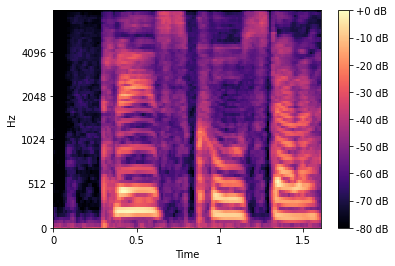

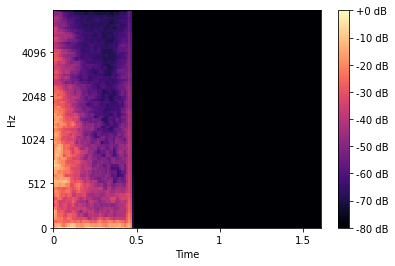

In [3]:
import importlib
import data.VCTK
importlib.reload(data.VCTK) # prevent cache when making changes

dataset = data.VCTK.VCTKDataset(vctk_dataset_path)
print(dataset[0][1].shape)
dataset.show(dataset[0])

In [8]:
import model.model
import numpy as np
importlib.reload(model.model) # prevent cache when making changes

model = model.model.MyModel()
# print(model)

text, clips = dataset[0]
x = clips

y_pred = model(x)

torch.Size([2, 80, 129])

torch.Size([2, 512, 125])

torch.Size([2, 512, 121])

torch.Size([2, 512, 117])

torch.Size([2, 117, 512])

torch.Size([2, 117, 64])
torch.Size([2, 117, 32])
torch.Size([2, 117, 32])

